In [ ]:
import numpy as np
from numpy import random
import pandas_datareader as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.get_data_yahoo('BBCA.JK', start='2019-01-01', end='2021-01-01')
dataset = dataset.drop("Adj Close", axis=1)

In [ ]:
dataset

,High,Low,Open,Close,Volume
Date,,,,,
2019-01-01,26000.0,26000.0,26000.0,26000.0,0.0
2019-01-02,26225.0,26000.0,26000.0,26200.0,7191200.0
2019-01-03,26100.0,25575.0,26000.0,25900.0,14471600.0
2019-01-04,26025.0,25625.0,25875.0,26025.0,10293000.0
2019-01-07,26625.0,26225.0,26325.0,26225.0,14687600.0
...,...,...,...,...,...
2020-12-22,34100.0,33550.0,33700.0,33575.0,12358100.0
2020-12-23,34525.0,33100.0,34525.0,33625.0,15389600.0
2020-12-28,34100.0,33300.0,33950.0,33900.0,12046800.0


In [ ]:
nullhigh = dataset['High'].isnull().values.any()
nulllow = dataset['Low'].isnull().values.any()
nullopen = dataset['Open'].isnull().values.any()
nullclose = dataset['Close'].isnull().values.any()
nullvolume = dataset['Volume'].isnull().values.any()
print(f'Null in:\nHigh: {nullhigh}\nLow: {nulllow}\nOpen: {nullopen}\nClose: {nullclose}\nVolume: {nullvolume}')

Null in:
High: False
Low: False
Open: False
Close: False
Volume: False


In [ ]:
corr1 = dataset.corr()
corr2 = corr1['Close'].abs().sort_values(ascending = False)
print("Correlation between Independent Variables and Dependent Variable\n")
print(corr2)

Correlation between Independent Variables and Dependent Variable

Close     1.000000
Low       0.990410
High      0.987301
Open      0.982934
Volume    0.184419
Name: Close, dtype: float64


In [ ]:
max_threshold = dataset['Close'].quantile(0.95)
min_threshold = dataset['Close'].quantile(0.05)
dataset = dataset[(dataset['Close']<max_threshold) & (dataset['Close']>min_threshold)]
dataset

,High,Low,Open,Close,Volume
Date,,,,,
2019-01-01,26000.0,26000.0,26000.0,26000.0,0.0
2019-01-02,26225.0,26000.0,26000.0,26200.0,7191200.0
2019-01-04,26025.0,25625.0,25875.0,26025.0,10293000.0
2019-01-07,26625.0,26225.0,26325.0,26225.0,14687600.0
2019-01-08,26600.0,26025.0,26150.0,26200.0,13249500.0
...,...,...,...,...,...
2020-12-10,33000.0,32700.0,32950.0,32875.0,30284100.0
2020-12-11,33900.0,32975.0,33000.0,33675.0,42832000.0
2020-12-22,34100.0,33550.0,33700.0,33575.0,12358100.0


In [ ]:
train_data, test_data = train_test_split(dataset, test_size=0.2, shuffle = False)

In [ ]:
train_label = train_data["Close"]
train_data.pop("Close")

test_label = test_data["Close"]
test_data.pop("Close")

Date
2020-08-04    31050.0
2020-08-05    31025.0
2020-08-06    31300.0
2020-08-07    30900.0
2020-08-10    30600.0
               ...   
2020-12-10    32875.0
2020-12-11    33675.0
2020-12-22    33575.0
2020-12-23    33625.0
2020-12-29    33825.0
Name: Close, Length: 90, dtype: float64

In [ ]:
def normalize(dataset):
    column_keys = dataset.keys()
    for i in range(0, len(dataset.columns)):
            dataset[column_keys[i]] = dataset[column_keys[i]] / np.max(dataset[column_keys[i]])

In [ ]:
train_label = train_label / np.max(train_label)
test_label = test_label / np.max(test_label)
normalize(test_data)
normalize(train_data)

train_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,High,Low,Open,Volume
Date,,,,
2019-01-01,0.759679,0.772086,0.759679,0.000000
2019-01-02,0.766253,0.772086,0.759679,0.108421
2019-01-04,0.760409,0.760950,0.756026,0.155187
2019-01-07,0.777940,0.778768,0.769175,0.221444
2019-01-08,0.777210,0.772829,0.764061,0.199761
...,...,...,...,...
2020-07-27,0.897005,0.890869,0.891161,0.126563
2020-07-28,0.905771,0.899777,0.894083,0.196841
2020-07-29,0.903579,0.905716,0.903579,0.151561


In [ ]:
def ground_truth(dataset, weight):
    value = dataset * weight
    return value

In [ ]:
def calculate_cost(dataset, label, weight, length):
    y = ground_truth(dataset, weight)
    y = np.sum(y, axis = 1)
    value = sum(np.sqrt((y - label)**2)) / (2 * length)
    return value

In [ ]:
def gradient_descent(dataset, label, weight, learning_rate, epoch):
    cost_function = []
    i = 0
    while i < epoch:
        y = ground_truth(dataset, weight)
        y = np.sum(y, axis = 1)
        for j in range(0, len(dataset.columns)):
            weight[j] = weight[j] - learning_rate * (sum((y - label) * dataset.iloc[:, j]) / len(dataset))
        cost = calculate_cost(dataset, label, weight , len(dataset))
        cost_function.append(cost)
        i = i + 1
    return cost_function, weight

In [ ]:
weight = random.rand(4)

In [ ]:
def train(dataset, label, weight, learning_rate, epoch):
    cost, weight = gradient_descent(dataset, label, weight, learning_rate, epoch)
    plt.figure()
    plt.scatter(x = list(range(0, epoch)), y = cost)
    plt.show()
    return weight

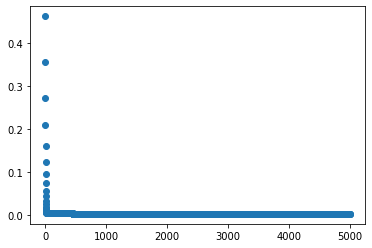

In [ ]:
weight = train(train_data, train_label, weight, 0.1, 5000)

In [ ]:
test_data

,High,Low,Open,Volume
Date,,,,
2020-08-04,0.900797,0.909496,0.891383,0.196900
2020-08-05,0.900797,0.905045,0.897900,0.122553
2020-08-06,0.911658,0.917656,0.900072,0.137107
2020-08-07,0.910210,0.913947,0.907314,0.108232
2020-08-10,0.897900,0.905786,0.895004,0.093726
...,...,...,...,...
2020-12-10,0.955829,0.970326,0.954381,0.375703
2020-12-11,0.981897,0.978487,0.955829,0.531372
2020-12-22,0.987690,0.995549,0.976104,0.153314


In [ ]:
def test(test_data):
    predicted = ground_truth(test_data, weight)
    predicted = np.sum(predicted, axis = 1)
    return predicted

predicted = test(test_data)

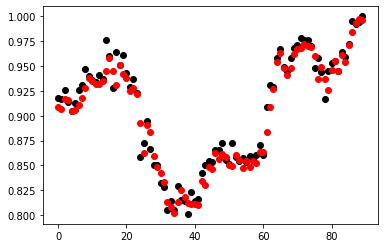

In [ ]:
plt.figure()
plt.scatter(x = list(range(0, len(test_label))), y = test_label, color = 'black')
plt.scatter(x = list(range(0, len(predicted))), y = predicted, color = 'red')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(test_label, predicted)
score = r2_score(test_label, predicted)
score = score * 100
print (f"MSE : {MSE:.4f}")
print (f"R2 : {score:.2f}%")

MSE : 0.0001
R2 : 95.91%
